### Figures for the $m$-d tensor cross-interpolation simulations.

In [12]:
import numpy as np

import matplotlib.pyplot as plt

# Force imported libraries and modules to auto-reload
%load_ext autoreload
%autoreload 2

from tools import merge_pkl, read_field, create_subplots, fit_power_law

DATA_PATH = "data/"
SHOW_FIGURES = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Set parameter ranges
range_m = range(1, 10 + 1)

# Set fixed parameters
fixed_n = 20
max_r = 100
fixed_t = 1e-14

# Load results
params_m = {"m": range_m, "n": fixed_n, "r": max_r, "t": fixed_t, "order": "A"}
data_m_prod_A = merge_pkl(params_m, name="cross_md_prod", path=DATA_PATH)
data_m_sqz_A = merge_pkl(params_m, name="cross_md_sqz", path=DATA_PATH)
data_m_abs_A = merge_pkl(params_m, name="cross_md_abs", path=DATA_PATH)
data_m_step_A = merge_pkl(params_m, name="cross_md_step", path=DATA_PATH)
params_m["order"] = "B"
data_m_prod_B = merge_pkl(params_m, name="cross_md_prod", path=DATA_PATH)
data_m_sqz_B = merge_pkl(params_m, name="cross_md_sqz", path=DATA_PATH)
data_m_abs_B = merge_pkl(params_m, name="cross_md_abs", path=DATA_PATH)
data_m_step_B = merge_pkl(params_m, name="cross_md_step", path=DATA_PATH)

In [14]:
from tools import set_plot_parameters, STYLE_FIT_1, STYLE_FIT_2

set_plot_parameters()

# Styles
STYLE_GP_A = {"linestyle": "solid", "marker": "o", "color": "tab:blue"}
STYLE_GP_B = {"linestyle": "solid", "marker": "v", "color": "tab:blue"}

STYLE_GS_A = {"linestyle": (0, (1, 1)), "marker": "o", "color": "tab:purple"}
STYLE_GS_B = {"linestyle": (0, (1, 1)), "marker": "v", "color": "tab:purple"}

STYLE_A_A = {"linestyle": "dashdot", "marker": "o", "color": "tab:orange"}
STYLE_A_B = {"linestyle": "dashdot", "marker": "v", "color": "tab:orange"}

STYLE_S_A = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": "o", "color": "tab:green"}
STYLE_S_B = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": "v", "color": "tab:green"}

Plot accuracies in sampled norm-$\infty$ for both the result and simplified MPS.

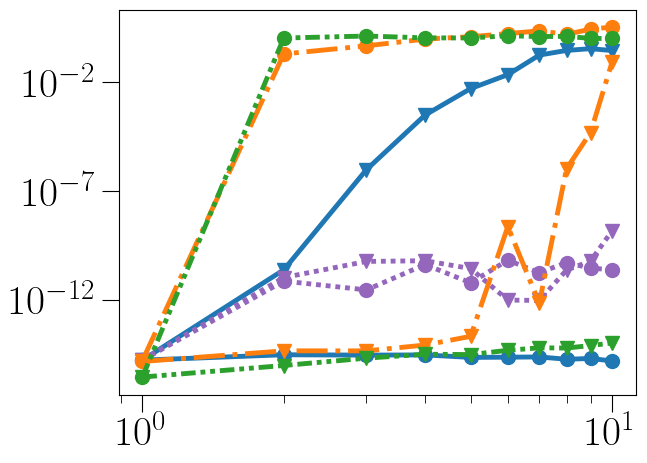

In [15]:
def plot_norms_m(ax):
    ax.loglog(range_m, read_field(data_m_prod_A, "mean_error"), **STYLE_GP_A)
    ax.loglog(range_m, read_field(data_m_prod_B, "mean_error"), **STYLE_GP_B)
    ax.loglog(range_m, read_field(data_m_sqz_A, "mean_error"), **STYLE_GS_A)
    ax.loglog(range_m, read_field(data_m_sqz_B, "mean_error"), **STYLE_GS_B)
    ax.loglog(range_m, read_field(data_m_abs_A, "mean_error"), **STYLE_A_A)
    ax.loglog(range_m, read_field(data_m_abs_B, "mean_error"), **STYLE_A_B)
    ax.loglog(range_m, read_field(data_m_step_A, "mean_error"), **STYLE_S_A)
    ax.loglog(range_m, read_field(data_m_step_B, "mean_error"), **STYLE_S_B)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_m(ax)

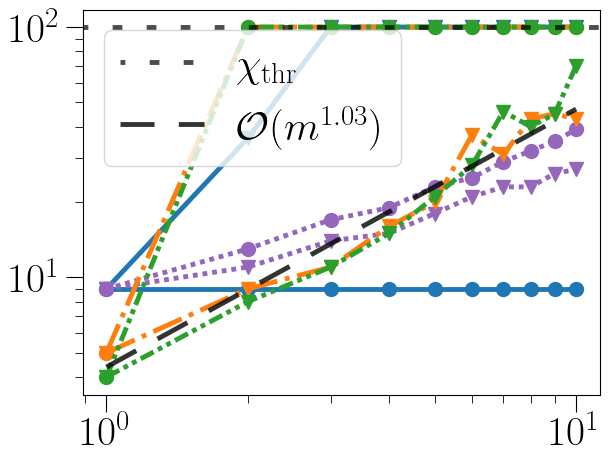

In [16]:
# fmt: off
def plot_bonds_m(ax):
    ax.loglog(range_m, read_field(data_m_prod_A, "mean_maxbond"), **STYLE_GP_A)
    ax.loglog(range_m, read_field(data_m_prod_B, "mean_maxbond"), **STYLE_GP_B)
    ax.loglog(range_m, read_field(data_m_sqz_A, "mean_maxbond"), **STYLE_GS_A)
    ax.loglog(range_m, read_field(data_m_sqz_B, "mean_maxbond"), **STYLE_GS_B)
    ax.loglog(range_m, read_field(data_m_abs_A, "mean_maxbond"), **STYLE_A_A)
    ax.loglog(range_m, read_field(data_m_abs_B, "mean_maxbond"), **STYLE_A_B)
    ax.loglog(range_m, read_field(data_m_step_A, "mean_maxbond"), **STYLE_S_A)
    ax.loglog(range_m, read_field(data_m_step_B, "mean_maxbond"), **STYLE_S_B)
    ax.axhline(
        y=100, linestyle=(1, (2, 5)), color="k", alpha=0.7, label=r"$\chi_\mathrm{thr}$"
    )
    fit_power_law(ax, range_m, read_field(data_m_abs_B, "mean_maxbond"), label='m', style=STYLE_FIT_1)
    ax.legend()
    

if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_bonds_m(ax)

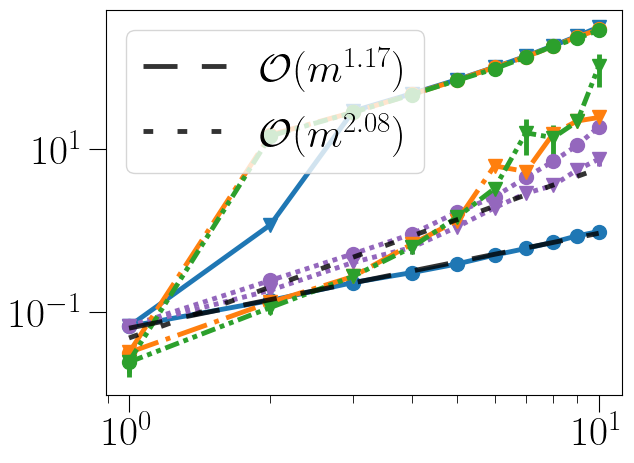

In [17]:
# fmt: off
def plot_times_m(ax):
	ax.errorbar(range_m, read_field(data_m_prod_A, "mean_time"), read_field(data_m_prod_A, "std_time"), **STYLE_GP_A)
	ax.errorbar(range_m, read_field(data_m_prod_B, "mean_time"), read_field(data_m_prod_B, "std_time"), **STYLE_GP_B)
	ax.errorbar(range_m, read_field(data_m_sqz_A, "mean_time"), read_field(data_m_sqz_A, "std_time"), **STYLE_GS_A)
	ax.errorbar(range_m, read_field(data_m_sqz_B, "mean_time"), read_field(data_m_sqz_B, "std_time"), **STYLE_GS_B)
	ax.errorbar(range_m, read_field(data_m_abs_A, "mean_time"), read_field(data_m_abs_A, "std_time"), **STYLE_A_A)
	ax.errorbar(range_m, read_field(data_m_abs_B, "mean_time"), read_field(data_m_abs_B, "std_time"), **STYLE_A_B)
	ax.errorbar(range_m, read_field(data_m_step_A, "mean_time"), read_field(data_m_step_A, "std_time"), **STYLE_S_A)
	ax.errorbar(range_m, read_field(data_m_step_B, "mean_time"), read_field(data_m_step_B, "std_time"),  **STYLE_S_B)
	ax.set_xscale("log")
	ax.set_yscale("log")
	fit_power_law(ax, range_m, read_field(data_m_prod_A, "mean_time"), label='m', style=STYLE_FIT_1)
	fit_power_law(ax, range_m, read_field(data_m_sqz_B, "mean_time"), label='m', style=STYLE_FIT_2)
	ax.legend()


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_times_m(ax)

Text(0.5, 1.0, '$(n, \\ \\chi_{\\mathrm{max}}, \\ \\epsilon) = (20, \\ 100, \\ 10^{-14})$\n (a)')

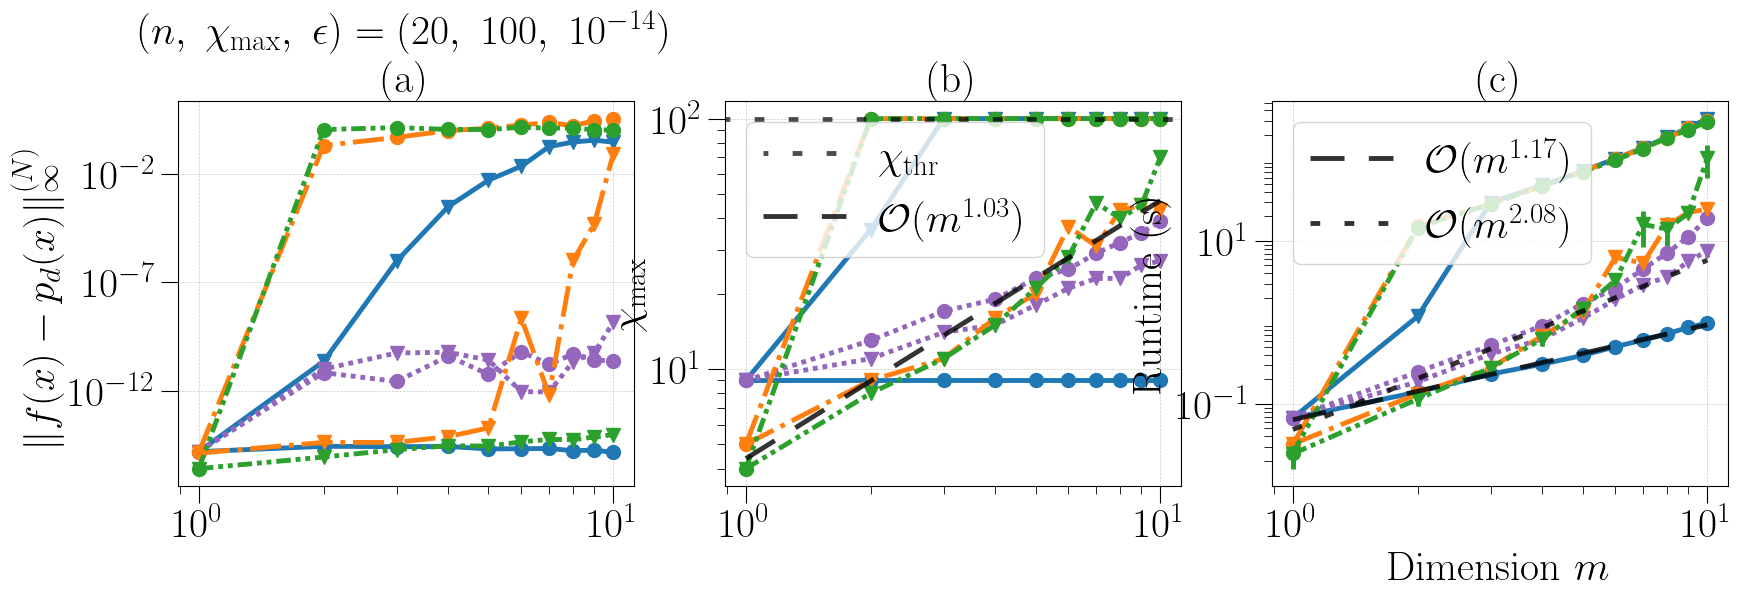

In [18]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(1, 3, sharex='col')

plot_norms_m(axs[0])
plot_bonds_m(axs[1])
plot_times_m(axs[2])

axs[2].set_xlabel(r"Dimension $m$")

row_labels = [
    r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$",
    r"$\chi_{\mathrm{max}}$",
    "Runtime (s)",
]
for ax, row in zip(axs, row_labels):
    ax.set_ylabel(row)
    
for i, ax in enumerate(axs.flat):
    ax.set_title(f"(" + chr(ord("a") + i) + ")")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

axs[0].set_title(r"$(n, \ \chi_{\mathrm{max}}, \ \epsilon) = (20, \ 100, \ 10^{-14})$" + "\n (a)")
# plt.savefig("figures/cross_md.pdf", dpi=300, bbox_inches="tight")

### Combine the plots with those of MPS/QTT Chebyshev approximation

The figures in the paper combine the plots for TCI with those of Chebyshev approximation in the multidimensional case. Hence, in this section of the notebook we combine those figures.

In [19]:
# Set parameter ranges
range_m = list(range(1, 10 + 1))
range_m_pb = list(range(1, 4 + 1))
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_m = 10
fixed_n = 20
max_d = 100
fixed_t = 1e-14

# Load the data with respect to the dimension m and tolerance t
params_m = {"m": range_m, "n": fixed_n, "d": max_d, "t": fixed_t, "order": "A"}
data_m_pa = merge_pkl(params_m, name="chebyshev_md_product", path=DATA_PATH)
data_m_sa = merge_pkl(params_m, name="chebyshev_md_squeezed", path=DATA_PATH)
params_m["order"] = "B"
data_m_sb = merge_pkl(params_m, name="chebyshev_md_squeezed", path=DATA_PATH)
params_m["m"] = range_m_pb
data_m_pb = merge_pkl(params_m, name="chebyshev_md_product", path=DATA_PATH)

params_t = {"m": fixed_m, "n": fixed_n, "d": max_d, "t": range_t, "order": "A"}
data_t_pa = merge_pkl(params_t, name="chebyshev_md_product", path=DATA_PATH)
data_t_sa = merge_pkl(params_t, name="chebyshev_md_squeezed", path=DATA_PATH)
params_t["order"] = "B"
data_t_sb = merge_pkl(params_t, name="chebyshev_md_squeezed", path=DATA_PATH)

# Styles
STYLE_PRODUCT_A = {"linestyle": "solid", "marker": "o", "color": "tab:blue"}
STYLE_PRODUCT_B = {"linestyle": "solid", "marker": "v", "color": "tab:blue"}
STYLE_SQUEEZED_A = {"linestyle": (0, (1, 1)), "marker": "o", "color": "tab:purple"}
STYLE_SQUEEZED_B = {"linestyle": (0, (1, 1)), "marker": "v", "color": "tab:purple"}

In [20]:
# fmt: off
from tools import fit_exponential

def plot_norms_m_cheb(ax):
	ax.errorbar(range_m, read_field(data_m_pa, "mean_error"), read_field(data_m_pa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_PRODUCT_A)
	ax.errorbar(range_m_pb, read_field(data_m_pb, "mean_error"), read_field(data_m_pb, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_PRODUCT_B)
	ax.errorbar(range_m, read_field(data_m_sa, "mean_error"), read_field(data_m_sa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_A)
	ax.errorbar(range_m, read_field(data_m_sb, "mean_error"), read_field(data_m_sb, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_B)
	ax.set_xscale("log")
	ax.set_yscale("log")

def plot_norms_t_cheb(ax):
	ax.errorbar(range_t, read_field(data_t_pa, "mean_error"), read_field(data_t_pa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_PRODUCT_A)
	ax.errorbar(range_t, read_field(data_t_sa, "mean_error"), read_field(data_t_sa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_A)
	ax.errorbar(range_t, read_field(data_t_sb, "mean_error"), read_field(data_t_sb, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_B)
	ax.set_xscale("log")
	ax.set_yscale("log")
	fit_power_law(ax, range_t, read_field(data_t_pa, "mean_error"), label='\epsilon', style=STYLE_FIT_1)
	ax.legend()

def plot_bonds_m_cheb(ax):
	ax.loglog(range_m, read_field(data_m_pa, "maxbond"), **STYLE_PRODUCT_A)
	ax.loglog(range_m_pb, read_field(data_m_pb, "maxbond"), **STYLE_PRODUCT_B)
	ax.loglog(range_m, read_field(data_m_sa, "maxbond"), **STYLE_SQUEEZED_A)
	ax.loglog(range_m, read_field(data_m_sb, "maxbond"), **STYLE_SQUEEZED_B)
	fit_exponential(ax, range_m_pb, read_field(data_m_pb, "maxbond"), label='m', style=STYLE_FIT_1)
	fit_power_law(ax, range_m, read_field(data_m_sb, "maxbond"), label='m', style=STYLE_FIT_2)
	ax.legend()

def plot_bonds_t_cheb(ax):
	ax.loglog(range_t, read_field(data_t_pa, "maxbond"), **STYLE_PRODUCT_A)
	ax.loglog(range_t, read_field(data_t_sa, "maxbond"), **STYLE_SQUEEZED_A)
	ax.loglog(range_t, read_field(data_t_sb, "maxbond"), **STYLE_SQUEEZED_B)

def plot_times_m_cheb(ax):
	ax.loglog(range_m, read_field(data_m_pa, "time"), **STYLE_PRODUCT_A)
	ax.loglog(range_m_pb, read_field(data_m_pb, "time"), **STYLE_PRODUCT_B)
	ax.loglog(range_m, read_field(data_m_sa, "time"), **STYLE_SQUEEZED_A)
	ax.loglog(range_m, read_field(data_m_sb, "time"), **STYLE_SQUEEZED_B)
	fit_power_law(ax, range_m, read_field(data_m_pa, "time"), label="m", fit_range=slice(2, 10), plot_range=slice(None), style=STYLE_FIT_1)
	fit_power_law(ax, range_m, read_field(data_m_sb, "time"), label="m", style=STYLE_FIT_2)
	# fit_power_law(ax, range_m, read_field(data_m_pa, "time"), fit_range=slice(4, -1), plot_range=slice(None), label='m', style=STYLE_FIT_1)
	# fit_power_law(ax, range_m, read_field(data_m_sb, "time"), label='m', style=STYLE_FIT_1)
	ax.legend()

def plot_times_t_cheb(ax):
	ax.loglog(range_t, read_field(data_t_pa, "time"), **STYLE_PRODUCT_A)
	ax.loglog(range_t, read_field(data_t_sa, "time"), **STYLE_SQUEEZED_A)
	ax.loglog(range_t, read_field(data_t_sb, "time"), **STYLE_SQUEEZED_B)
	fit_power_law(ax, range_t, read_field(data_t_pa, "time"), label='\epsilon', style=STYLE_FIT_1)
	fit_power_law(ax, range_t, read_field(data_t_sb, "time"), label="\epsilon", fit_range=slice(1,15), style=STYLE_FIT_2)
	ax.legend()

<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:50: SyntaxWarning: invalid escape sequence '\e'
<>:51: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:50: SyntaxWarning: invalid escape sequence '\e'
<>:51: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_260583/3968205225.py:18: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_pa, "mean_error"), label='\epsilon', style=STYLE_FIT_1)
/tmp/ipykernel_260583/3968205225.py:50: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_pa, "time"), label='\epsilon', style=STYLE_FIT_1)
/tmp/ipykernel_260583/3968205225.py:51: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_sb, "time"), label="\epsilon", fit_range=slice(1,15), style=STYLE_FIT_2)


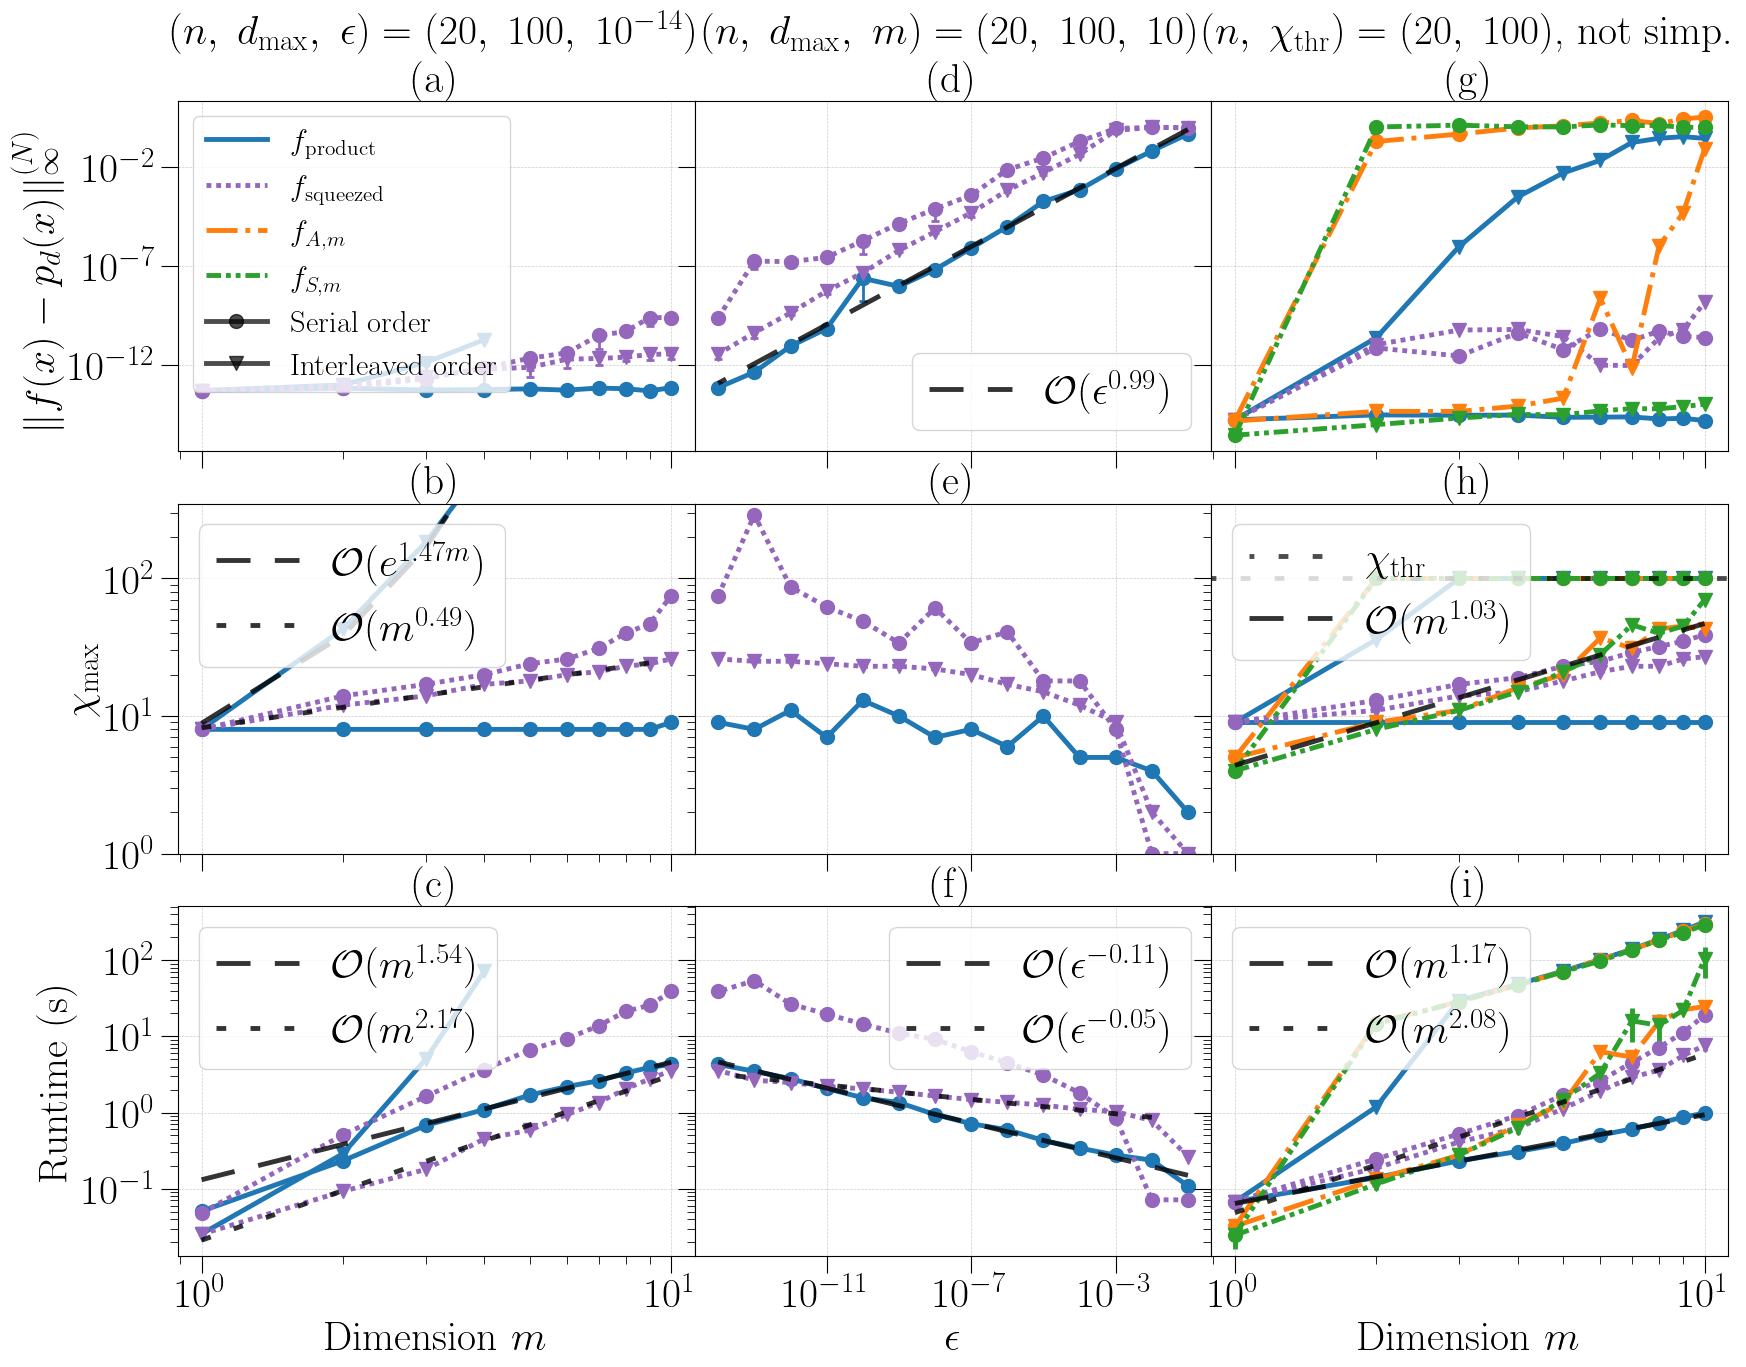

In [21]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(3, 3, sharex='col', sharey='row')

plot_norms_m_cheb(axs[0, 0])
plot_bonds_m_cheb(axs[1, 0])
plot_times_m_cheb(axs[2, 0])
plot_norms_t_cheb(axs[0, 1])
plot_bonds_t_cheb(axs[1, 1])
plot_times_t_cheb(axs[2, 1])
plot_norms_m(axs[0, 2])
plot_bonds_m(axs[1, 2])
plot_times_m(axs[2, 2])

column_labels = [r"Dimension $m$", r"$\epsilon$", r"Dimension $m$"]
for ax, col in zip(axs[2], column_labels):
    ax.set_xlabel(col)

row_labels = [
    r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$",
    r"$\chi_{\mathrm{max}}$",
    "Runtime (s)",
]
for ax, row in zip(axs[:, 0], row_labels):
    ax.set_ylabel(row)

for i, ax in enumerate(axs.flat):
    rows, cols = axs.shape 
    col_wise_index = np.ravel_multi_index(np.unravel_index(i, (rows, cols), order='F'), (cols, rows))
    ax.set_title(f"(" + chr(ord("a") + col_wise_index) + ")")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

axs[0,0].set_title(r"$(n, \ d_{\mathrm{max}}, \ \epsilon) = (20, \ 100, \ 10^{-14})$" + "\n (a)")
axs[0,1].set_title(r"$(n, \ d_{\mathrm{max}}, \ m) = (20, \ 100, \ 10)$" + "\n (d)")
axs[0,2].set_title(r"$(n, \ \chi_{\mathrm{thr}}) = (20, \ 100)$, not simp." + "\n (g)")

for ax in axs[1, :]:  # Loop through the seconds row
	ax.set_ylim(1, 350)

# Draw legend
line_prod = plt.Line2D([], [], color="tab:blue", linestyle="solid")
line_sqz = plt.Line2D([], [], color="tab:purple", linestyle=(0, (1, 1)))
line_abs = plt.Line2D([], [], color="tab:orange", linestyle="dashdot")
line_step = plt.Line2D([], [], color="tab:green", linestyle=(0, (3, 1, 1, 1, 1, 1)))
line_serial = plt.Line2D([], [], color="k", marker="o", alpha=0.7)
line_interleaved = plt.Line2D([], [], color="k", marker="v", alpha=0.7)
lines = [line_prod, line_sqz, line_abs, line_step, line_serial, line_interleaved]
labels = [
	r"$f_{\mathrm{product}}$",
	r"$f_{\mathrm{squeezed}}$",
	r"$f_{A, m}$",
	r"$f_{S, m}$",
	"Serial order",
	"Interleaved order",
]
axs[0,0].legend(lines, labels, fontsize=22)

fig.subplots_adjust(hspace=0.15, wspace=0.0)
plt.savefig("figures/chebyshev_cross_md.pdf", dpi=300, bbox_inches="tight")

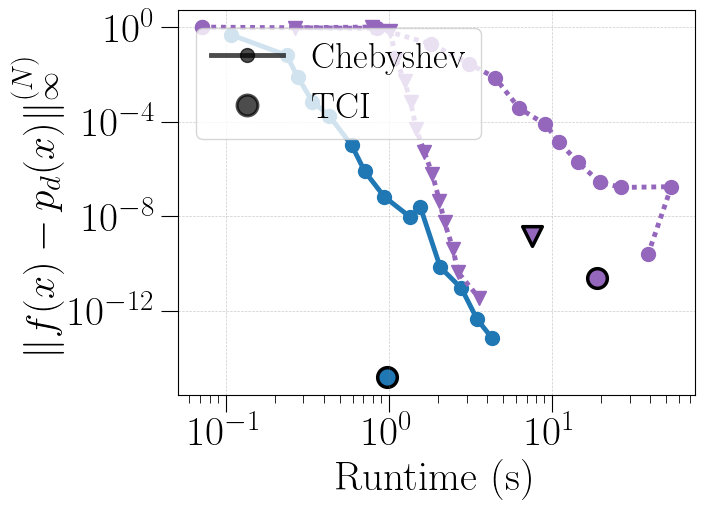

In [22]:
# fmt: off
def plot_benchmark_cross(ax):
    ax.plot(read_field(data_t_pa, "time"), read_field(data_t_pa, "mean_error"), **STYLE_PRODUCT_A)
    ax.plot(read_field(data_t_sa, "time"), read_field(data_t_sa, "mean_error"), **STYLE_SQUEEZED_A)
    ax.plot(read_field(data_t_sb, "time"), read_field(data_t_sb, "mean_error"), **STYLE_SQUEEZED_B)

    ax.scatter(read_field(data_m_prod_A, "mean_time")[-1], read_field(data_m_prod_A, "mean_error")[-1], 
        edgecolor='k', s=200, linewidths=2.5, **STYLE_PRODUCT_A)
    ax.scatter(read_field(data_m_sqz_A, "mean_time")[-1], read_field(data_m_sqz_A, "mean_error")[-1], 
        edgecolor='k', s=200, linewidths=2.5, linestyle='solid', marker='o', color='tab:purple', zorder=3)
    ax.scatter(read_field(data_m_sqz_B, "mean_time")[-1], read_field(data_m_sqz_B, "mean_error")[-1], 
        edgecolor='k', s=200, linewidths=2.5, linestyle='solid', marker='v', color='tab:purple', zorder=3)
    ax.set_xscale("log")
    ax.set_yscale("log")

    line_cheb = plt.Line2D([], [], color='k', marker='o',  alpha=0.7, linestyle='-')
    line_cross = plt.Line2D([], [], color='k', marker='o', alpha=0.7,  markersize=15, linestyle='None', markeredgecolor='k', markeredgewidth=2.2)
    lines = [line_cheb, line_cross]
    labels = ["Chebyshev", "TCI"]
    ax.legend(lines, labels, fontsize=26, loc='upper left')
    ax.grid(which="major")

if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_benchmark_cross(ax)
	ax.set_xlabel("Runtime (s)")
	ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")
	plt.savefig("figures/cheb_vs_cross_10d.pdf", dpi=300, bbox_inches="tight")

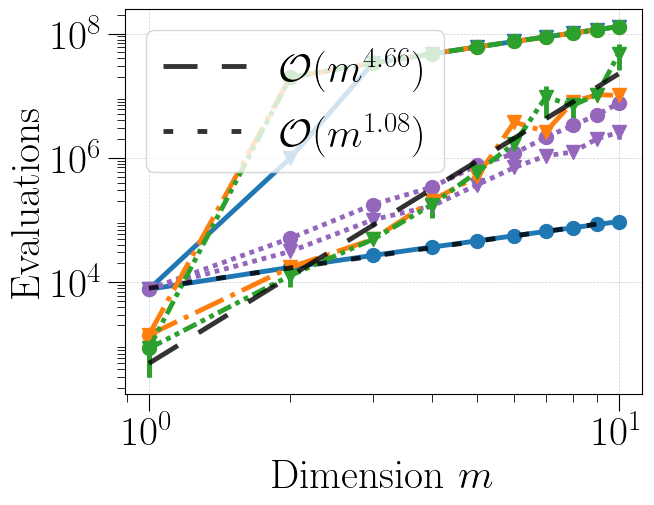

In [23]:
# fmt: off
def plot_evals_m(ax):
    ax.errorbar(range_m, read_field(data_m_prod_A, "mean_evals"), read_field(data_m_prod_A, "std_evals"), **STYLE_GP_A)
    ax.errorbar(range_m, read_field(data_m_prod_B, "mean_evals"), read_field(data_m_prod_B, "std_evals"), **STYLE_GP_B)
    ax.errorbar(range_m, read_field(data_m_sqz_A, "mean_evals"), read_field(data_m_sqz_A, "std_evals"),  **STYLE_GS_A)
    ax.errorbar(range_m, read_field(data_m_sqz_B, "mean_evals"), read_field(data_m_sqz_B, "std_evals"), **STYLE_GS_B)
    ax.errorbar(range_m, read_field(data_m_abs_A, "mean_evals"), read_field(data_m_abs_A, "std_evals"), **STYLE_A_A)
    ax.errorbar(range_m, read_field(data_m_abs_B, "mean_evals"), read_field(data_m_abs_B, "std_evals"), **STYLE_A_B)
    ax.errorbar(range_m, read_field(data_m_step_A, "mean_evals"), read_field(data_m_step_A, "std_evals"), **STYLE_S_A)
    ax.errorbar(range_m, read_field(data_m_step_B, "mean_evals"), read_field(data_m_step_B, "std_evals"), **STYLE_S_B)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    fit_power_law(ax, range_m, read_field(data_m_step_B, "mean_evals"), label='m', style=STYLE_FIT_1)
    fit_power_law(ax, range_m, read_field(data_m_prod_A, "mean_evals"), label='m', style=STYLE_FIT_2)
    ax.legend()


if SHOW_FIGURES:
    fig, ax = plt.subplots()
    ax.set_xlabel(r"Dimension $m$")
    ax.set_ylabel("Evaluations")
    plot_evals_m(ax)
    plt.savefig("figures/cross_evals_md.pdf", dpi=300, bbox_inches="tight")